# Welcome to music21!

music21 is a powerful application developed by Michael Cuthbert at MIT for analyzing music.

## Starting music21

Loading the music 21 import

In [4]:
from music21 import *

By successfully loading the music21 library into Python. This allowed me to start running my music analyses.

## Import your file

Indicating to python the location of the file by declaring the variable file path and setting its value to the location of the musicXML file.

In [5]:
filePath = "All Of The Lights.musicXML"

Running two commands at once to import the file:

In [6]:
p = converter.parse(filePath)
print(p)

<music21.stream.Score 0x127118290>


The above code shows that music21 has stored your score in  a stream.

To see the structures and values in a stream, you neefd to run a looping command in Python. You run the command (or series of commands) over and over as long as a particular condition is met. 

In [7]:
for el in p.recurse():
    print (el.offset, el, el.activeSite)

0.0 <music21.text.TextBox 'All Of The...'> <music21.stream.Score 0x127118290>
0.0 <music21.text.TextBox 'My Beautif...'> <music21.stream.Score 0x127118290>
0.0 <music21.text.TextBox 'Kanye West'> <music21.stream.Score 0x127118290>
0.0 <music21.metadata.Metadata object at 0x127126110> <music21.stream.Score 0x127118290>
0.0 <music21.stream.Part Violoncello> <music21.stream.Score 0x127118290>
0.0 P1: Violoncello: Violoncello <music21.stream.Part Violoncello>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part Violoncello>
0.0 <music21.layout.SystemLayout> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.clef.BassClef> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.key.KeySignature of 5 flats> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.meter.TimeSignature 4/4> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Rest whole> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part Violoncello>
0.0 <music21.tempo.Metrono

## Analyzing your score
Key resource: http://web.mit.edu/music21/doc/usersGuide/index.html.

### Transform your score to chords
To view the chordal structures within your score:

In [23]:
pChords = p.chordify()
pChords.write('musicxml', fp="chords.xml")

PosixPath('/Users/tashwarder/MCA-2024/chords.xml')

- set a new variable, pChords The value of that variable was p (the stream that contains your score)
- ".chordify()" is the command that will distill your score into chords. 

- the second command writes the result of your chordify command to a musicXML "chords.xml".

then you need to run the following loop:

In [35]:
for c in pChords.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4,inPlace=True)
pChords.write('musicxml', fp="chords.xml")

PosixPath('/Users/tashwarder/MCA-2024/chords.xml')

### Perform harmonic analysis
Then music21 can analyse the chords

In [37]:
pAnalysis = pChords
for c in pAnalysis.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, key.Key('F'))
    c.addLyric(str(rn.figure))

pAnalysis.write('musicxml', fp="ChordAnalysis.xml")

PosixPath('/Users/tashwarder/MCA-2024/ChordAnalysis.xml')

### Get the ambitus
music21 can extract the range of a particular voice or instrument.


In [38]:
print(p.parts[0].analyze('ambitus'))

<music21.interval.Interval P15>


### Piano roll of pitches
Then music21 can generate a piano roll of your pitches. 

you can change which part you wish to plot by modifying the 0 in the first line. You can select the measures you wish to plot as well. 

In the second line, the 1 is the first measure to plot, and the 10 is the last measure. So, "voice.measures(40,75).plot()" would capture measures 40 through 75.

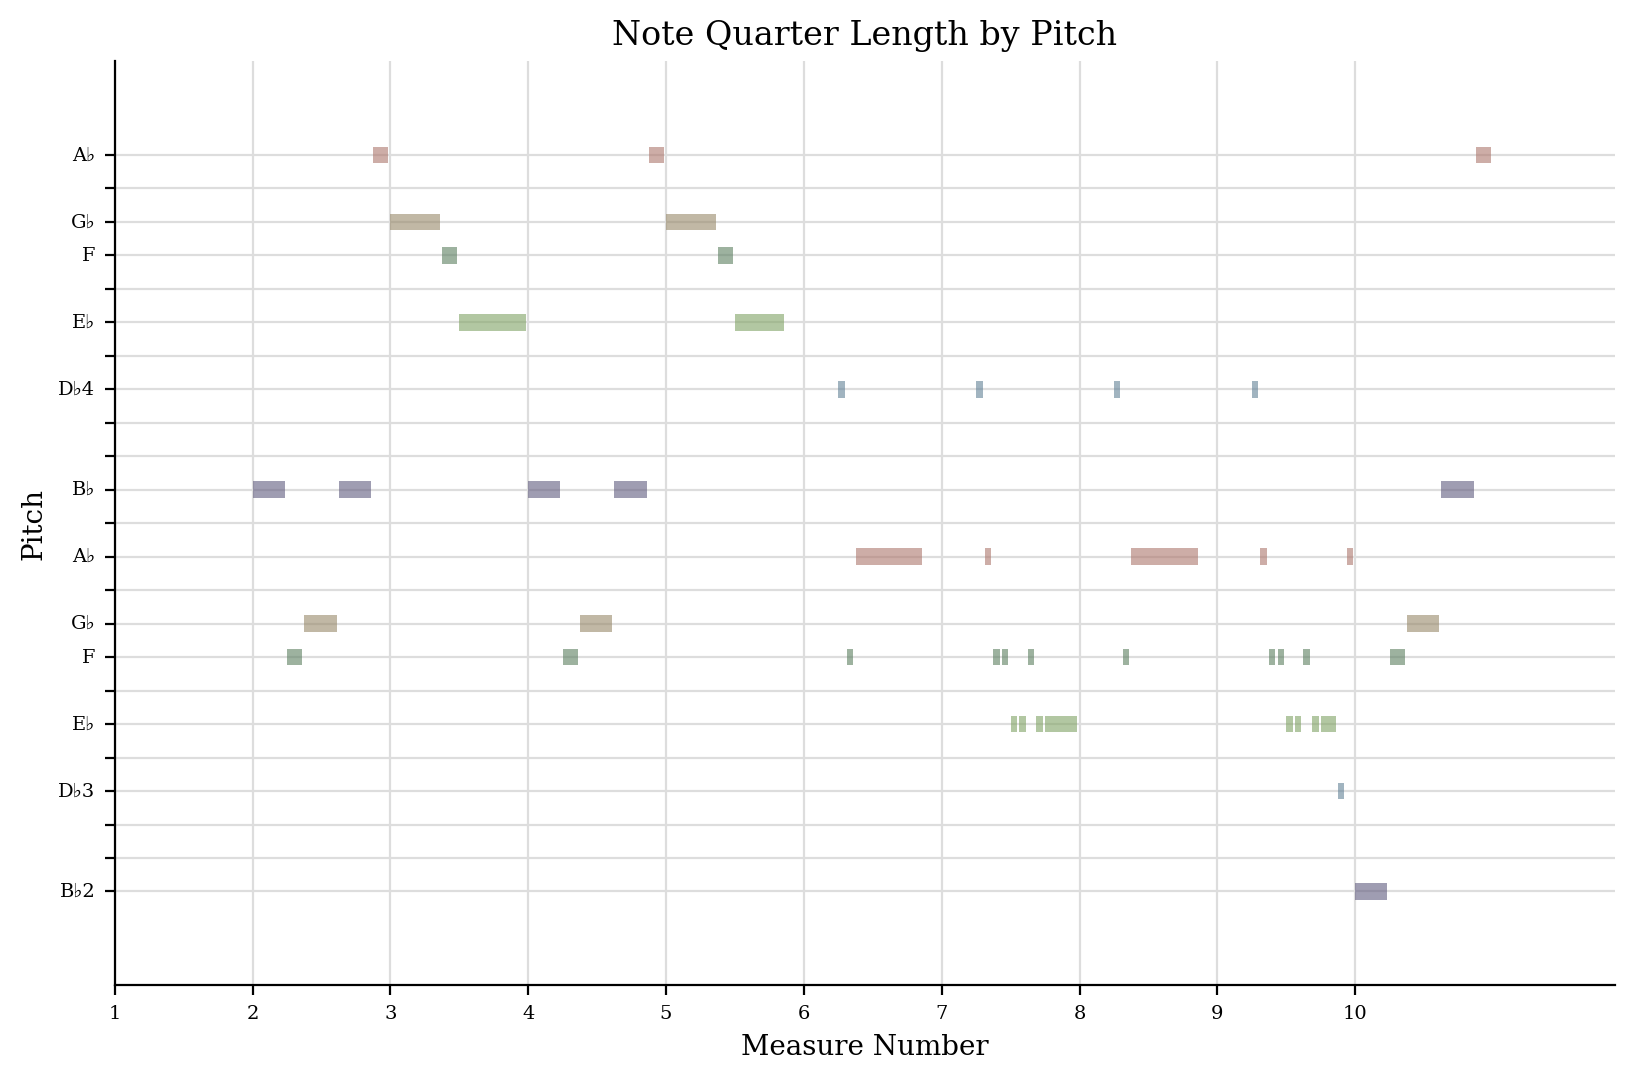

In [39]:
voice = p.parts[0]
voice.measures(1, 10).plot()

### Scatter plot of pitches
You can also generate a visualisation of the pitches that are present in your piece:
 

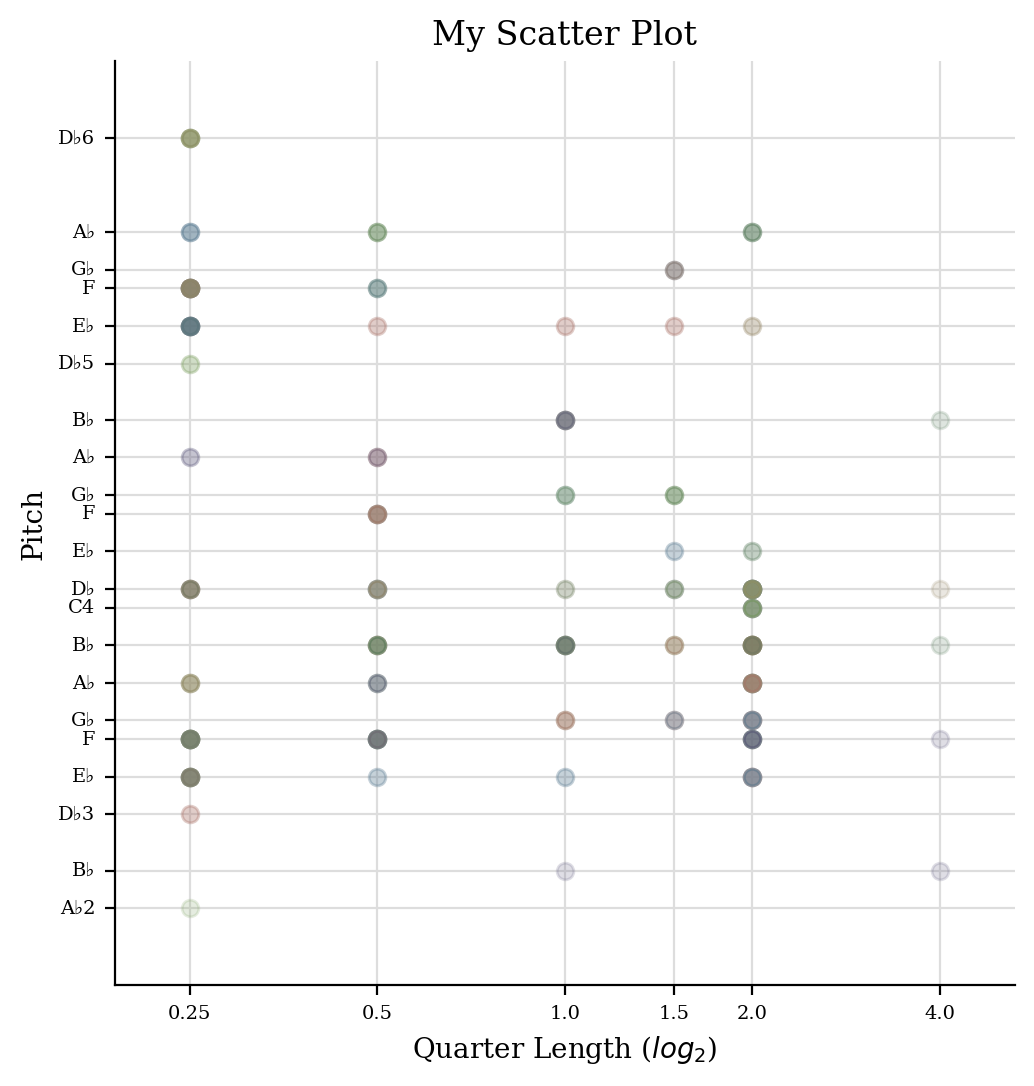

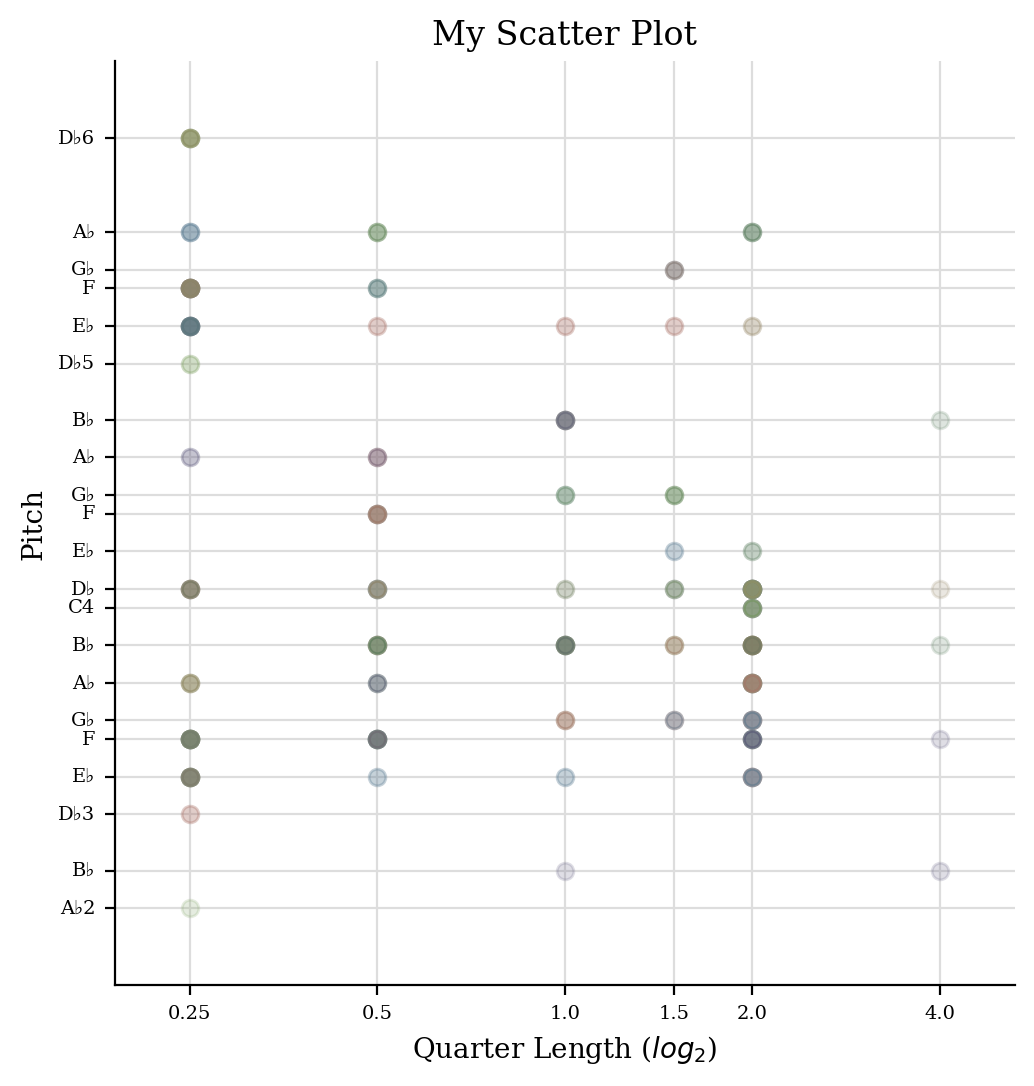

In [40]:
p.plot('scatter', 'quarterLength', 'pitch', title='My Scatter Plot')

### Pitch histogram
You can see which pitches are used most (or least) in your piece by creating a histogram. 

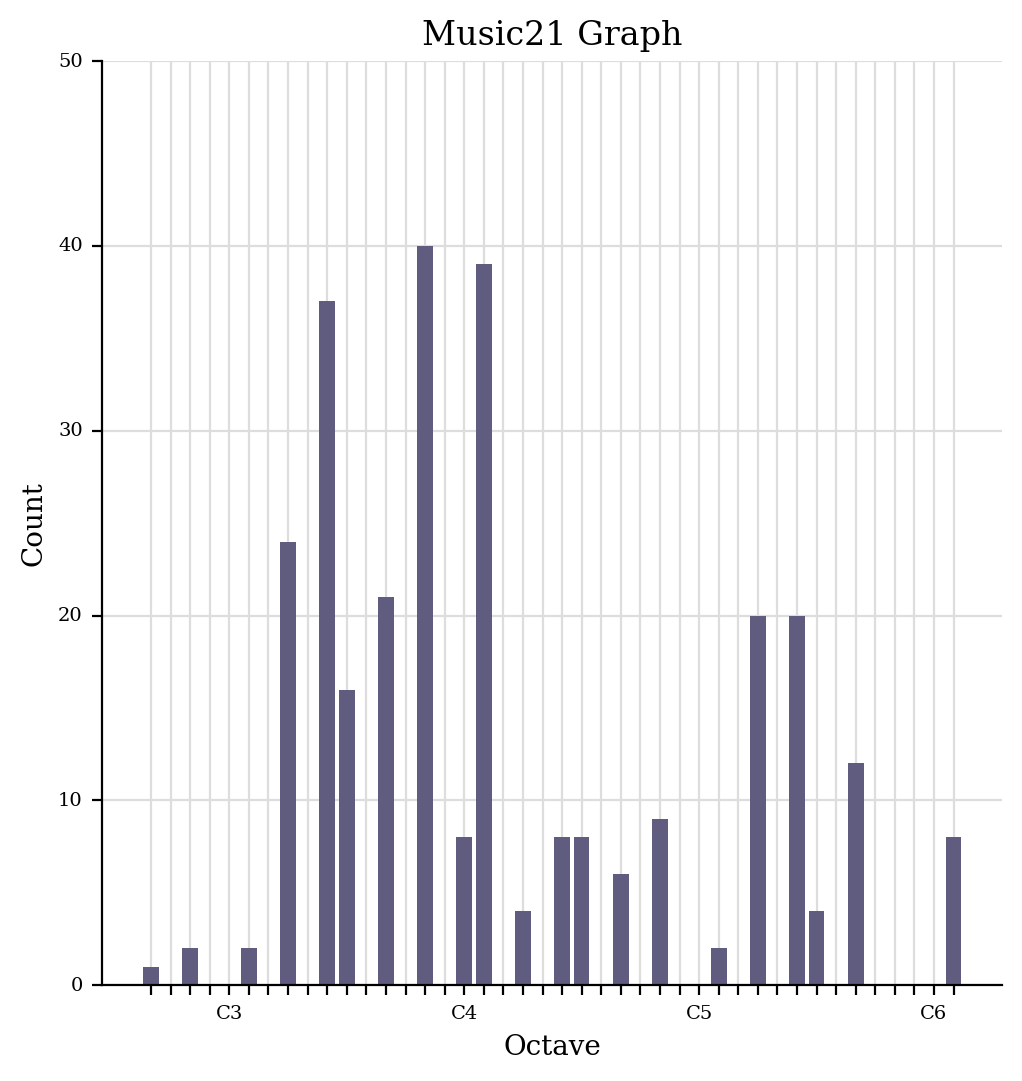

In [41]:
p.plot('histogram', 'octave', xHideUnused=False, xAxisLabel='Number of Pitches')